# MA933 Assignment 3

*Student ID: 2260253*

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

# built-in statistics function for unbiased variance
from statistics import variance

# probability distributions
from scipy import stats

#plotting
plt.rcParams['text.usetex'] = True
plt.rcParams.update({'font.size': 22})

## Question 2

For ease of reproducibility the below cell will generate the 20 realisations $G_{N,p}$ for each $z \in \{0.1,0.2,...,3.0\}$ and $N \in \{100,1000\}$ and combine the computational tasks in parts a,b and c.

In [2]:
Ns = [100, 1000]                  # number of nodes
zs = np.arange(0.1,3.1,0.1)       # expected degree
realisations = 20

# average sizes of largest and second largest components
L1avg = []
L2avg = []

# and standard deviations
L1err = []
L2err = []

# average number of edges
Eavg = []
Eerr = []

# average degree
davg = []
davgerr = []

# average local clustering coefficient
CCavg = []
CCerr = []

for N in Ns:
    for z in zs:
        # probability that an edge is added
        p = z/N
        
        # bins for largest and second largest componenets
        L1 = []
        L2 = []
        
        E = []    # number of edges
        d = []    # average degree
        
        if N == 1000:
            ccoef = []    # clustering coefficient
        
        for r in range(realisations):
            # generate ER random graph
            G = nx.gnp_random_graph(N,p)
        
            # get the components
            Gcc = sorted([G.subgraph(c) for c in nx.connected_components(G)], key = len, reverse=True)

            # size of largest and second largest components
            L1 += [len(Gcc[0])/N]
            L2 += [len(Gcc[1])/N]
            
            E += [G.number_of_edges()]    # number of edges
            d += [2*G.number_of_edges()/N]    # average degree
            
            # local clustering coefficient
            if N == 1000:
                coefs = list(nx.clustering(G).values())
                ccoef += [sum(coefs)/N]
            
        L1avg += [sum(L1)/realisations]
        L2avg += [sum(L2)/realisations]
        
        L1err += [np.sqrt(variance(L1))]
        L2err += [np.sqrt(variance(L2))]
        
        Eavg += [sum(E)/realisations]
        Eerr += [np.sqrt(variance(E))]
        
        davg += [sum(d)/realisations]
        davgerr += [np.sqrt(variance(d))]
        
        if N == 1000:
            CCavg += [sum(ccoef)/realisations]
            CCerr += [np.sqrt(variance(ccoef))]

**Question 2(a)**

Below we plot the largest and second largest component mean size scaled by $N$ for each $z$. The size of the largest component (denoted $|\bar{C}_{N,p}|$) initially remains low for $z < 1$ before we encounter a phase change at $z = 1$ before its size appears to grow and increase with diminishing returns at a similar rate for both values of $N$ for $z>1$. The size of the second largest component remains rather low for all values of $z$, increasing at a slow rate for approximately $z<1$ before decreasing towards zero for $z>1$. The scaled size of the second largest component is generally higher for $N=100$ over $N=1000$.

Recalling the Giant Component for ER Graphs Theorem, we have that

\begin{equation}
\theta(z) = \lim_{N \rightarrow \infty} \frac{|\bar{C}_{N,p}|}{N} = 
\begin{cases}
0 & z \leq 1 \\
> 0 & z > 1
\end{cases} .
\end{equation}

This implies that for $z > 1$, the maximal connected component $|\bar{C}_{N,p}|$ is the only giant component in the graph. Our plot below is consistent with this fact as we can see $|\bar{C}_{N,p}|$ is dominating in size and the relative size of the next largest component remains near zero as $z$ increases for both values of $N$.

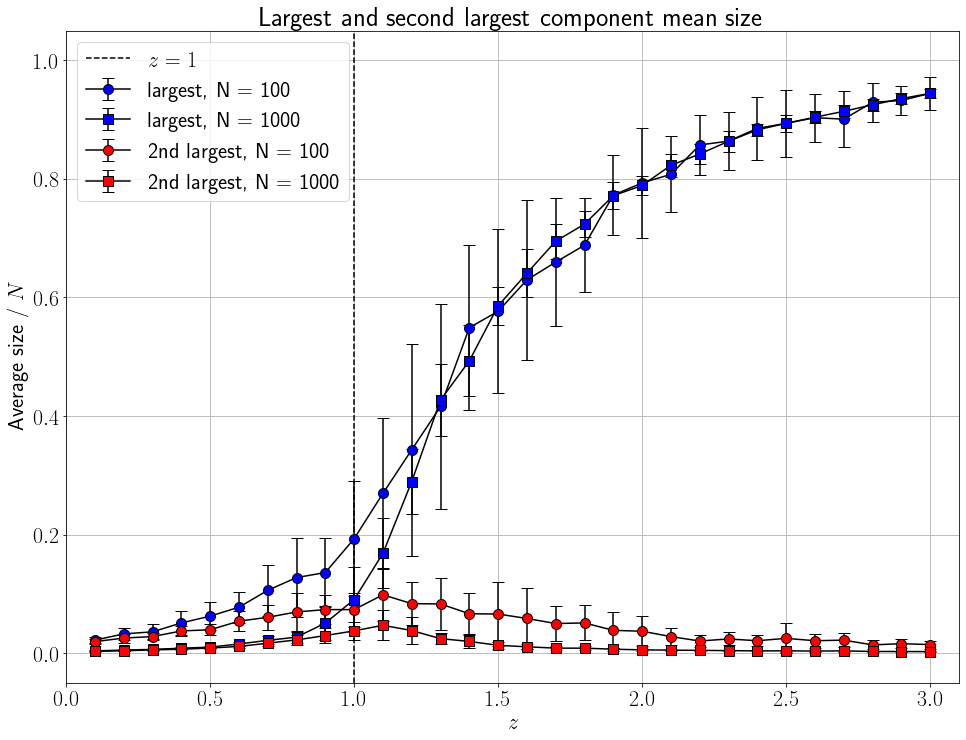

In [9]:
# plotting
fig = plt.figure(figsize=(16,12))

plt.errorbar(zs, L1avg[:len(zs)], L1err[:len(zs)], color='k', marker='o', mfc='b', ms=10, capsize=6,
            label = 'largest, N = 100')
plt.errorbar(zs, L1avg[len(zs):], L1err[len(zs):], color='k', marker='s', mfc='b', ms=10, capsize=6,
            label = 'largest, N = 1000')
plt.errorbar(zs, L2avg[:len(zs)], L2err[:len(zs)], color='k', marker='o', mfc='r', ms=10, capsize=6,
            label = '2nd largest, N = 100')
plt.errorbar(zs, L2avg[len(zs):], L2err[len(zs):], color='k', marker='s', mfc='r', ms=10, capsize=6,
            label = '2nd largest, N = 1000')
plt.vlines(1, -0.05, 1.05, color='k', linestyle='dashed', label='$z = 1$')

plt.xlabel('$z$')
plt.ylabel('Average size / $N$')
plt.title('Largest and second largest component mean size')
plt.xlim([0,3.1])
plt.ylim([-0.05,1.05])
plt.legend(loc=0)
plt.grid()

**Question 2(b)**

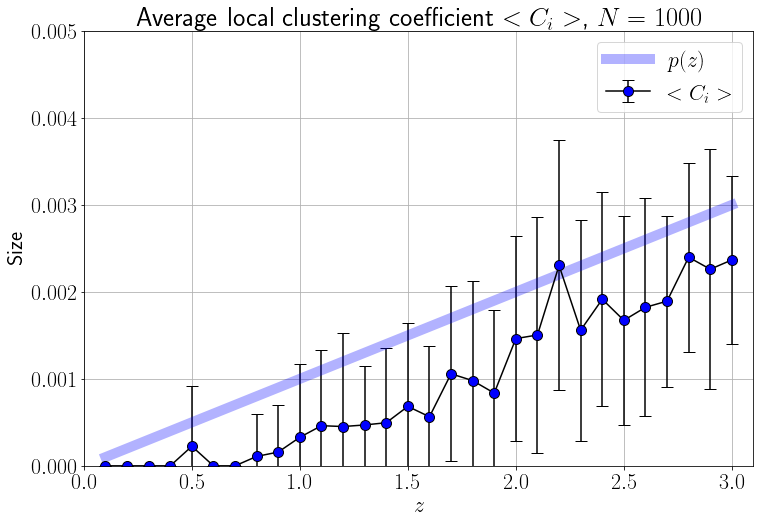

In [14]:
# plotting
fig = plt.figure(figsize=(12,8))

plt.errorbar(zs, CCavg, CCerr, color='k', marker='o', mfc='b', ms=10, capsize=6, label='$<C_i>$')
plt.plot(zs, zs/N, 'b', alpha=0.3, linewidth=10, label='$p(z)$')

plt.xlabel('$z$')
plt.ylabel('Size')
plt.title('Average local clustering coefficient $<C_i>$, $N = 1000$')
plt.xlim([0,3.1])
plt.ylim([0,0.005])
plt.legend(loc=0)
plt.grid()
plt.show()

Above we have plotted the average local clustering coefficient $<C_i>$ across our 20 realisations against $z$ for $N=1000$. The coefficient is rather low and increases with $z$ at a rate comparable to the probability $p(z) = z/N$. This is in line with our expectations for typical ER graph behaviour, since the number of triangles in an ER graph is ${N\choose3} p^3$ and the number of triples in an ER graph is ${N\choose3} 3 p^2$, we can find the clustering coefficient:

$$C = \frac{{N\choose3} 3 p^3}{{N\choose3} 3 p^2} = p = \frac{z}{N}$$

**Question 2(c)**

From the lecture material, the expected number of undirected edges $K$ and the average degree $<k>$ are

$$\mathbb{E}[K] = {N\choose2} p(z) = \frac{N-1}{2} z$$

and

$$\mathbb{E}[<k>] = (N-1) p(z) = \frac{N-1}{N} z$$

respectively.

Below we have plotted the average number of edges and the average degree as well as their corresponding standard deviation errors according to the relevant 20 realisations for all $z$.

With regards to average number of edges, we see both plots increase linearly with $z$ and closely follow their respective theoretical rates. We see the average number of edges for $N=1000$ increase at a greater rate when compared to $N=100$. This can be expected, as the coefficient in the theoretical expectation is $(1000-1)/2 = 499.5$ for $N=1000$ compared to $(100-1)/2 = 49.5$ for $N=100$, roughly ten times smaller.

With regards to the average degree, we see both plots increase linearly with $z$ and closely follow their respective theoretical rates. In fact, they increase at nearly the exact same rate. This is because the coefficient in the theoretical expectation is $(1000-1)/1000 = 0.999$ for $N=1000$ compared to $(100-1)/100 = 0.99$ for $N=100$.

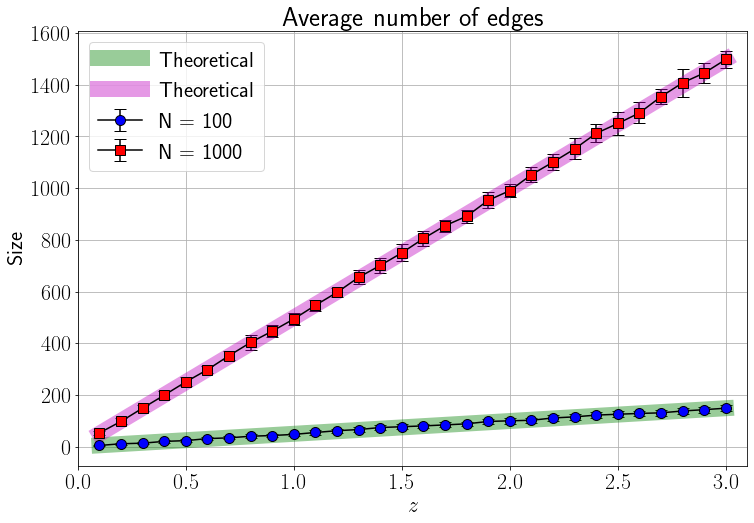

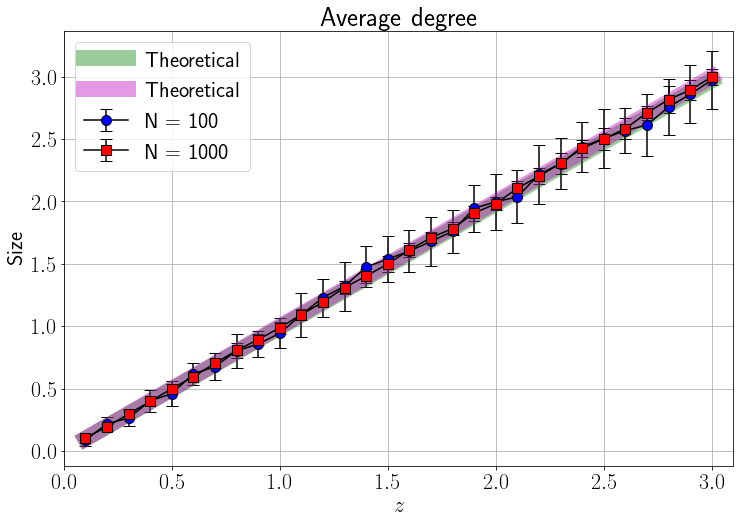

In [15]:
# plotting average number of edges
fig = plt.figure(figsize=(12,8))

plt.errorbar(zs, Eavg[:len(zs)], Eerr[:len(zs)], color='k', marker='o', mfc='b', ms=10, capsize=6,
            label = 'N = 100')
plt.errorbar(zs, Eavg[len(zs):], Eerr[len(zs):], color='k', marker='s', mfc='r', ms=10, capsize=6,
            label = 'N = 1000')
plt.plot(zs, ((100-1)/2)*zs, color='g', linewidth=16, alpha=0.4, label='Theoretical')
plt.plot(zs, ((1000-1)/2)*zs, color='m', linewidth=16, alpha=0.4, label='Theoretical')

plt.xlabel('$z$')
plt.ylabel('Size')
plt.title('Average number of edges')
plt.xlim([0,3.1])
plt.legend(loc=0)
plt.grid()
plt.show()

# plotting average degree
fig = plt.figure(figsize=(12,8))

plt.errorbar(zs, davg[:len(zs)], davgerr[:len(zs)], color='k', marker='o', mfc='b', ms=10, capsize=6,
            label = 'N = 100')
plt.errorbar(zs, davg[len(zs):], davgerr[len(zs):], color='k', marker='s', mfc='r', ms=10, capsize=6,
            label = 'N = 1000')
plt.plot(zs, ((100-1)/100)*zs, color='g', linewidth=16, alpha=0.4, label='Theoretical')
plt.plot(zs, ((1000-1)/1000)*zs, color='m', linewidth=16, alpha=0.4, label='Theoretical')

plt.xlabel('$z$')
plt.ylabel('Size')
plt.title('Average degree')
plt.xlim([0,3.1])
plt.legend(loc=0)
plt.grid()

**Question 2(d)**

In [16]:
# function to calculate the degree distribution of a graph
def degree_distribution(G):
    vk = dict(G.degree())
    vk = list(vk.values())  
    vk = np.array(vk)        # store degree values in array
    
    maxk = np.max(vk)
    k = np.arange(0,maxk+1) # possible values of k
    
    pk = np.zeros(maxk+1) # degree distribution p(k)
    for i in vk:
        pk[i] = pk[i] + 1
    pk = pk/sum(pk) # the sum of the elements of P(k) must to be equal to one
    
    return k,pk

Simulating 20 new realizations for $N = 1000$ and $z = 1.8$

In [17]:
N = 1000
z = 1.8
p = z/N

# degree distribution
ks = np.arange(0,16)
degdist = np.zeros(16)

for r in range(realisations):
    # generate ER random graph
    G = nx.gnp_random_graph(N,p)
    dist = degree_distribution(G)[1]
    
    for i in range(len(dist)):
        degdist[i] += dist[i] 

degdist = degdist/realisations

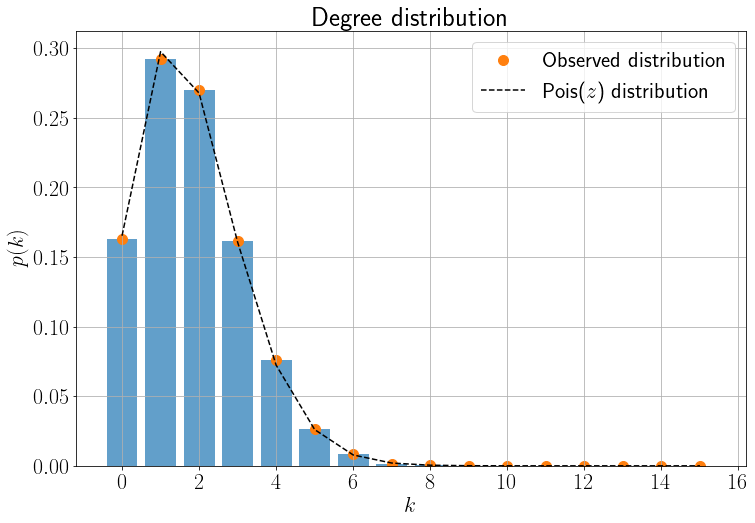

In [18]:
poisdist = stats.poisson.pmf(ks, mu=z)

# plotting
fig = plt.figure(figsize = (12,8))
plt.bar(ks, degdist, alpha=0.7)
plt.scatter(ks, degdist, s=100, label='Observed distribution')
plt.plot(ks, poisdist, 'k--', label='Pois($z$) distribution')
plt.xlabel("$k$")
plt.ylabel("$p(k)$")
plt.title("Degree distribution")
plt.legend(loc=0)
plt.grid()

The observed degree distribution from our 20 realizations closely matches the probability distribution of a Poisson random variable with rate $z = 1.8$.

This is because for an ER graph, the degree distribution follows $k_i \sim \textrm{Binomial}(N-1,p)$. However, for $N-1 >> 1$ and $p << 1$ we know that the Binomial distribution is approximately a Poisson distribution $\sim \textrm{Pois}(\lambda)$ with rate parameter $\lambda = (N-1)p \approx z$.

**Question 2(e)**

Simulating new realisations for $z \in \{0.5,1.5,5,10\}$

/tmp/ipykernel_9147/500586921.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  E[r,:] = np.sort(evals)            # sort in order
/tmp/ipykernel_9147/500586921.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  E[r,:] = np.sort(evals)            # sort in order
/tmp/ipykernel_9147/500586921.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  E[r,:] = np.sort(evals)            # sort in order


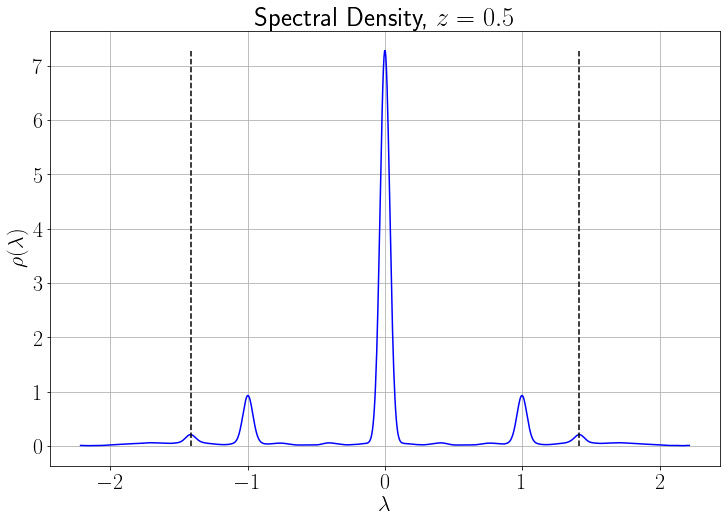

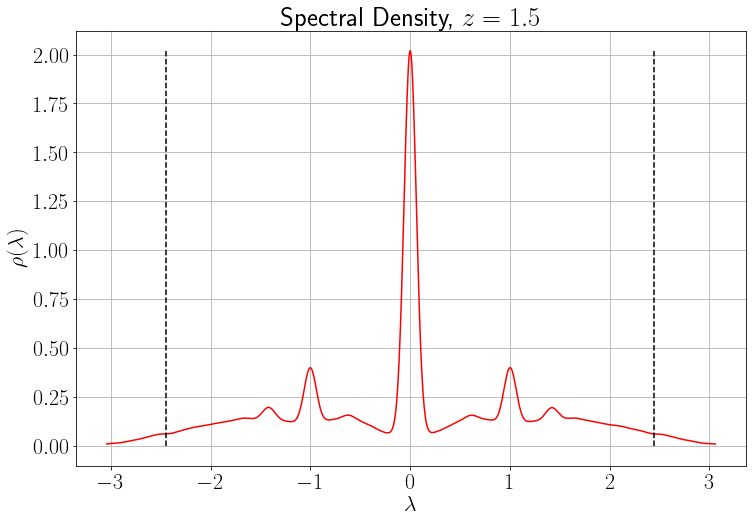

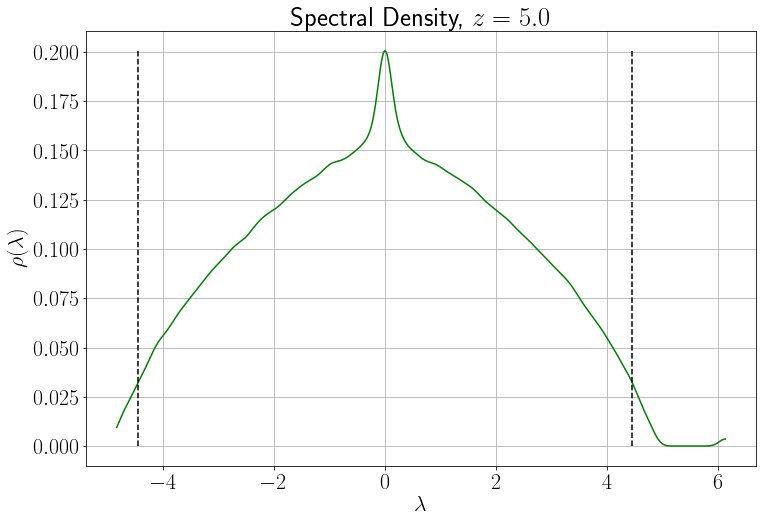

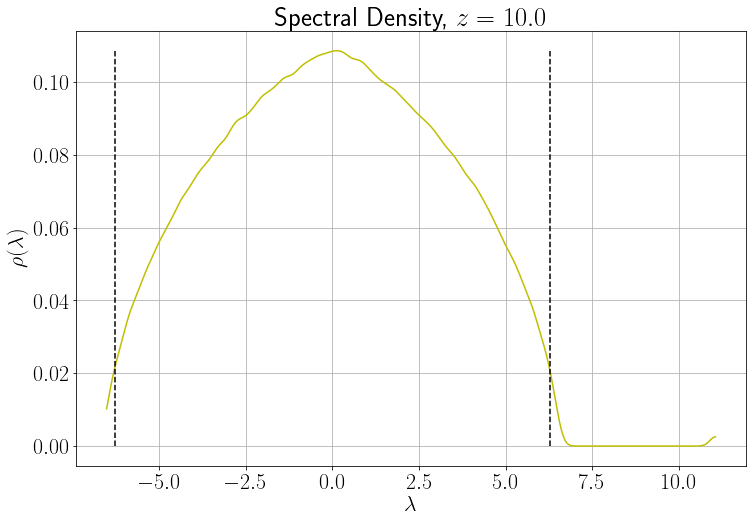

In [26]:
zs = [0.5, 1.5, 5, 10]
E = np.zeros((realisations,N))
avg_evals = np.zeros((len(zs),N))
cols = ['b','r','g','y']

j = 0
for z in zs:
    p = z/N
    
    for r in range(realisations):
        G = nx.gnp_random_graph(N,p)       # generate the graphs
        A = nx.to_numpy_matrix(G)          # find adjacency matrix
        evals, evecs = np.linalg.eig(A)    # calculate eigenvalues
        E[r,:] = np.sort(evals)            # sort in order

    avg_evals[j,:] = np.mean(E,axis=0)  #average the e'values over the realisations
    
    # plotting
    fig = plt.figure(figsize = (12,8))
    
    # find the spectral density using a kernel density estimate 
    spectral_density = stats.gaussian_kde(avg_evals[j,:], bw_method = 0.05)
    
    #plot the density
    lambs = np.linspace(avg_evals[j,:].min(), avg_evals[j,:].max(), N)
    plt.plot(lambs, spectral_density(lambs), color=cols[j])
    plt.vlines([-2*np.sqrt(N*p*(1-p)), +2*np.sqrt(N*p*(1-p))], 0, spectral_density(lambs).max(),
               color='k', linestyle='dashed')    # support interval
    
    plt.xlabel('$\lambda$')
    plt.ylabel('$\\rho(\lambda)$')
    plt.title('Spectral Density, $z = %.1f$' % zs[j])
    plt.grid()
    
    j += 1

Above we have plotted the spectral density for $z \in \{0.5, 1.5, 5, 10\}$ and $N = 1000$.

Wigner's semi-circle law states that the spectral density $\rho_N(\lambda)$ of unscaled Wigner matrices of mean $\mathbb{E}[a_{ij}] = p \neq 0$ and variance $\textrm{Var}(a_{ij}) = \sigma^2$ coverges in distribution to

\begin{equation}
\rho_N(\lambda) \rightarrow \rho_{sc}(\lambda) = 
\begin{cases}
\frac{2}{\pi R^2} \sqrt{R^2 - \lambda^2} & |\lambda| < R \\
0 & \textrm{otherwise.}
\end{cases}
\end{equation}

where $R = 2 \sqrt{N} \sigma$ .

Since the entries of adjacency matrices of ER random graphs obey a Bernoulli$(p)$ distribution with $\mathbb{E}[a_{ij}] = p \neq 0$ and $\textrm{Var}(a_{ij}) = p(1-p)$, they are not Wigner by definition. However, for $p > 1/N$ Wigner's semi-circle law holds in the limit $N \rightarrow \infty$ with support width $4 \sqrt{N p(1-p)}$. This is not true if $p < 1/N$.

For our probability $p(z) = z/N$ the above implies our spectral density should converge to the semi-circle distribution conditional on $z > 1$. For $z=0.5$ our spectral density does not resemble this distribution whatsoever, however as $z$ increases from 1.5 to 5 to 10 we see the semi-circle distribution emerge. I have added the support width in dashed black lines to indicate the cut-off points for the distribution to be non-zero, and as $z$ increases the semi-circle begins to take shape within this interval.


Finally, in each spectral density plot we can clearly make out the maximum eigenvalue which is near-zero for all $z$. 

## Question 3

For ease of reproducibility the below cell will generate the 20 realisations of the Barabasi-Albert model for $m = m_0 = 5, \, N = 1000$ and combine the computational tasks in parts a,b and c.

In [29]:
# in this implementation m0 = m.

m = 5      # number of edges added each time (preferential attachment) (also the number of initial nodes)
N = 1000   # total number of nodes at the end
realisations = 20

# degree distribution
degdist = np.zeros(N)     # 20 realisations
degdist1 = np.zeros(N)    # first realisation only

# eigenvalues and their average
E = np.zeros((realisations,N))
avg_evals = np.zeros(N)

for r in range(realisations):
    # initialization is a graph with with m nodes and no edges.
    G = nx.barabasi_albert_graph(N, m) 
    dist = degree_distribution(G)[1]
    if r == 0:
        degdist1 = degree_distribution(G)[1]
        
    for i in range(len(dist)):
        degdist[i] += dist[i] 
    
    A = nx.to_numpy_matrix(G)          # find adjacency matrix
    evals, evecs = np.linalg.eig(A)    # calculate eigenvalues
    E[r,:] = np.sort(evals)            # sort in order

# aquiring the non-zero end of tail and adjusting the length of degdist accordingly
kmax = np.nonzero(degdist)[0].max()
degdist = degdist[:kmax+1]/realisations

kmax1 = np.nonzero(degdist1)[0].max()
degdist1 = degdist1[:kmax1+1]

avg_evals = np.mean(E,axis=0)  #average the eigenvalues over the realisations

**Question 3(a)**

Below I plot the **degree distribution** and compare it to a power law with exponent -3.

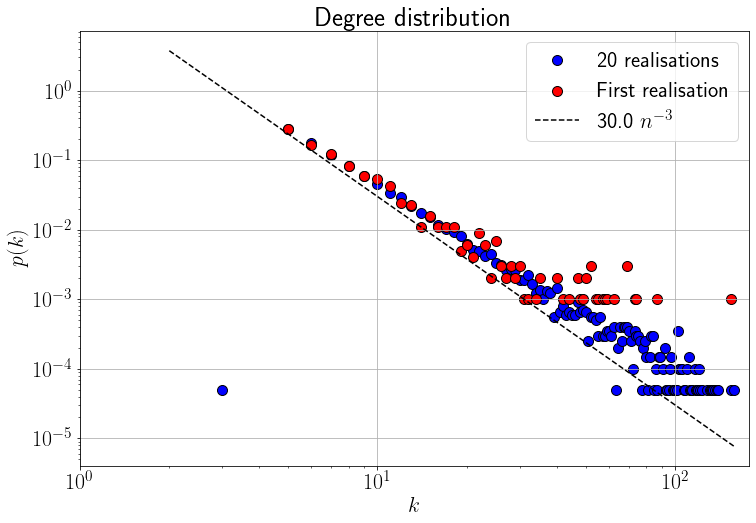

In [42]:
ks = np.arange(0,kmax+1)
ks1 = np.arange(0,kmax1+1)
alpha = 30    # power-law coefficient

# plotting
fig = plt.figure(figsize = (12,8))
plt.scatter(ks, degdist, color='b', edgecolors='k', s=100, label='20 realisations')
plt.scatter(ks1, degdist1, color='r', edgecolors='k', s=100, label='First realisation')
plt.plot(ks[2:], [alpha*i**-3 for i in range(2,kmax+1)], 'k--', label='%.1f $n^{-3}$' % alpha)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("$k$")
plt.ylabel("$p(k)$")
plt.title("Degree distribution")
plt.xlim([1,max(kmax,kmax1)+20])
plt.legend(loc=0)
plt.grid()

Excluding very low degrees $k$, the degree distribution follows a clear power-law with exponent -3 on a double log plot. We expect the concentration of nodes with high degree to drop off rapidly as $k$ increases.

**Question 3(b)**

comments

**Question 3(c)**

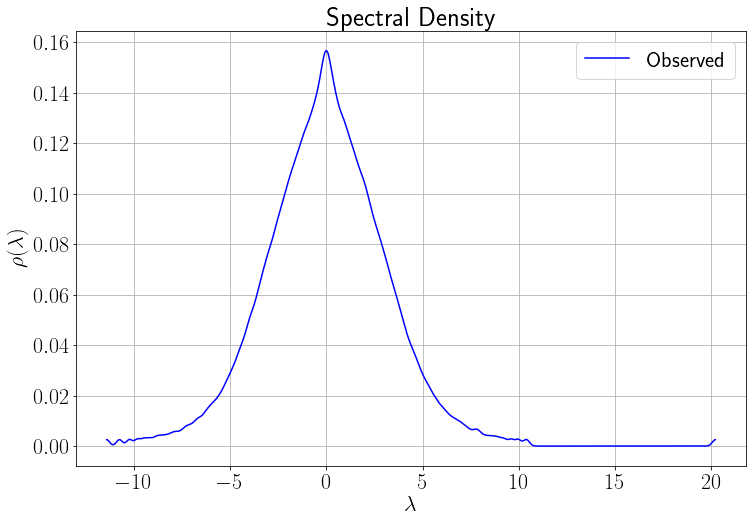

In [43]:
#plotting
fig = plt.figure(figsize = (12,8))
    
# find the spectral density using a kernel density estimate 
spectral_density = stats.gaussian_kde(avg_evals, bw_method = 0.05)

#plot the density
lambs = np.linspace(avg_evals.min(), avg_evals.max(), N)
plt.plot(lambs, spectral_density(lambs), color='b', label='Observed')
    
plt.xlabel('$\lambda$')
plt.ylabel('$\\rho(\lambda)$')
plt.title('Spectral Density')
plt.legend(loc=0)
plt.grid()

comments

$$\[k_{nn,i}^{w} = \frac{1}{s_i} \sum_{j \in N(i)} w_{ij} k_j\]$$

where $\(s_i\)$ is the weighted degree of node $\(i\)$, $\(w_{ij}\)$ is the weight of the edge that links $\(i\)$ and $\(j\)$, and $\(N(i)\)$ are the neighbors of node $\(i\)$.

In [54]:
m = 5
N = 1000

G = nx.barabasi_albert_graph(N, m)
knni = np.vstack(( np.array(list(nx.average_degree_connectivity(G).keys())), 
                  np.array(list(nx.average_degree_connectivity(G).values())) ))

In [55]:
def delta(x,y):
    if x == y:
        return 1
    else:
        return 0

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112])

In [76]:
[ks, dist] = degree_distribution(G)
ks

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112])

In [88]:
knni = np.vstack(( np.array(list(nx.average_degree_connectivity(G).keys())), 
                  np.array(list(nx.average_degree_connectivity(G).values())) ))
print(knni[0,:])
print(knni[1,:])
print(np.where(knni[0,:]==141)[0])
print(knni[1,np.where(knni[0,:]==141)[0]])

[103.  91.  33.  45. 112.   4. 105.  62.  71.  56. 109.  60.  74.  49.
  66.  44.  37.  36.  43.  35.  76.  34.  12.  39.  40.  46.  17.  22.
  11.  26.  21.  28.  19.  23.  31.  20.  16.  18.  24.  14.   9.  27.
  41.  32.  25.   7.  15.  30.  10.  13.   8.   6.   5.]
[17.32038835 17.78021978 20.93939394 17.98888889 15.94642857 41.75
 20.9047619  22.08064516 21.07042254 24.67857143 15.82568807 18.36666667
 17.64864865 18.35714286 18.24242424 17.93181818 21.16216216 16.57638889
 20.60465116 16.62857143 15.30263158 15.02941176 20.14367816 22.35897436
 19.5        18.67391304 20.39215686 19.93636364 21.96194503 19.52884615
 19.35714286 24.125      19.80116959 22.56521739 17.69354839 25.34
 19.03645833 17.08888889 16.1875     19.84453782 21.45261438 15.18518519
 15.09756098 18.375      16.512      21.75814536 20.21666667 14.56666667
 21.4027027  19.43910256 20.89608434 24.64711359 23.72862191]
[]
[]


In [116]:
def nearestneighbour(G):
    # function to compute the nearest neighbour k_nn(k) as defined in Q3(b) of MA933 Assignment 3
    # for a graph G
    
    # obtain average connectivity k_nn,i of G
    knni = np.vstack(( np.array(list(nx.average_degree_connectivity(G).keys())), 
                  np.array(list(nx.average_degree_connectivity(G).values())) ))
    print(knni)
    # degree distribution
    [ks, dist] = degree_distribution(G)
    dist = dist*len(G)
    print(ks)
    print(dist)
    # maximal degree
    kmax = ks.max()
    
    knn = np.zeros(kmax+1)
    
    for k in ks:
        denom = dist[k]
    
        if denom != 0:
            num = knni[1,np.where(knni[0,:]==k)[0]][0]
            knn[k] = num
    
    return knn

In [118]:
knn = nearestneighbour(G)
print(knn)

[[103.          91.          33.          45.         112.
    4.         105.          62.          71.          56.
  109.          60.          74.          49.          66.
   44.          37.          36.          43.          35.
   76.          34.          12.          39.          40.
   46.          17.          22.          11.          26.
   21.          28.          19.          23.          31.
   20.          16.          18.          24.          14.
    9.          27.          41.          32.          25.
    7.          15.          30.          10.          13.
    8.           6.           5.        ]
 [ 17.32038835  17.78021978  20.93939394  17.98888889  15.94642857
   41.75        20.9047619   22.08064516  21.07042254  24.67857143
   15.82568807  18.36666667  17.64864865  18.35714286  18.24242424
   17.93181818  21.16216216  16.57638889  20.60465116  16.62857143
   15.30263158  15.02941176  20.14367816  22.35897436  19.5
   18.67391304  20.39215686  19.93636364

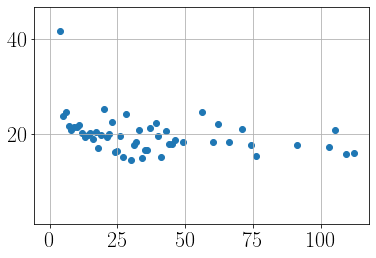

In [122]:
plt.scatter(range(113),knn)
plt.ylim([1,knn.max()+5])
plt.grid()